
<font size = "5"> **Chapter 2: [Diffraction](../Diffraction/CH2_00-Diffraction.ipynb)** </font>

<hr style="height:1px;border-top:4px solid #FF8200" />

# HW6:  Analyzing CBED Pattern in Two Beam Condition

[Download](https://raw.githubusercontent.com/gduscher/MSE672-Introduction-to-TEM//main/Homework/Homework06-TwoBeam.ipynb)

[![OpenInColab](https://colab.research.google.com/assets/colab-badge.svg)](
    https://colab.research.google.com/github/gduscher/MSE672-Introduction-to-TEM/blob/main/Homework/Homework06-TwoBeam.ipynb)
 
part of 

<font size = "5"> **[MSE672:  Introduction to Transmission Electron Microscopy](../_MSE672_Intro_TEM.ipynb)**</font>

**Spring 2024**
<table style="margin-right:auto;margin-left:0px">
  <tr>
    <td>Gerd Duscher </td>
    <td>Khalid Hattar</td>
  </tr>
  <tr>
    <td>Microscopy Facilities</td> 
    <td> Tennessee Ion Beam Materials Laboratory </td>
  </tr>
  
  <tr>
    <td>Materials Science & Engineering</td>
    <td> Nuclear Engineering</td>
  </tr>
  <tr>
    <td>Institute of Advanced Materials & Manufacturing</td>
    <td> </td>
  </tr>
  <tr>
    <td colspan="2"><center> The University of Tennessee, Knoxville</center> </td>
  </tr>
</table>

Background and methods to analysis and quantification of data acquired with transmission electron microscopes


## Load relevant python packages
### Check Installed Packages

In [2]:
import sys
from pkg_resources import get_distribution, DistributionNotFound

def test_package(package_name):
    """Test if package exists and returns version or -1"""
    try:
        version = get_distribution(package_name).version
    except (DistributionNotFound, ImportError) as err:
        version = '-1'
    return version


# pyTEMlib setup ------------------
if test_package('pyTEMlib') < '0.2024.1.0':
    print('installing pyTEMlib')
    !{sys.executable} -m pip install  --upgrade SciFiReaders -q
    !{sys.executable} -m pip install  --upgrade pyTEMlib -q
# ------------------------------
print('done')

C:\Users\gduscher\AppData\Local\Temp\ipykernel_25060\3125631658.py:2: DeprecationWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html
  from pkg_resources import get_distribution, DistributionNotFound


done


### Import numerical and plotting python packages
Import the python packages that we will use:

Beside the basic numerical (numpy) and plotting (pylab of matplotlib) libraries,

and some libraries from the book
* kinematic scattering library.
* file_tools library

In [1]:
%matplotlib  widget
import matplotlib.pyplot as plt
import numpy as np
import sys

if 'google.colab' in sys.modules:
    from google.colab import output
    output.enable_custom_widget_manager()
    from google.colab import drive

# additional package 
import os
import  itertools 
import scipy.constants as const

import ipywidgets as ipyw

# Import libraries from pyTEMlib
sys.path.insert(0, '../../pyTEMlib')
import pyTEMlib
import pyTEMlib.kinematic_scattering as ks         # Kinematic sCattering Library
                             # Atomic form factors from Kirklands book

### And we use the image tool library of Quantifit
import pyTEMlib.file_tools as ft
import pyTEMlib.image_tools
import pyTEMlib
print(pyTEMlib.__version__)

You don't have igor2 installed.     If you wish to open igor files, you will need to install it     (pip install igor2) before attempting.
You don't have gwyfile installed.     If you wish to open .gwy files, you will need to      install it (pip install gwyfile) before attempting.
Symmetry functions of spglib enabled
Using kinematic_scattering library version {_version_ }  by G.Duscher
SimpleITK not installed; Registration Functions for Image Stacks not available
install with: conda install -c simpleitk simpleitk 
0.2024.01.1


## Load CBED Pattern
>
>Please note, that this notebook will not work in Google colab becaus of the ``open file dialog``
>
First we select the diffraction pattern

In [2]:
# ------Input -------------
load_your_own_data = False
# -------------------------
if 'google.colab' in sys.modules:
    drive.mount("/content/drive")
    load_your_own_data = True
if load_your_own_data:
   fileWidget = ft.FileWidget()

0 1
1 1
Channel_000 sidpy.Dataset of type IMAGE with:
 dask.array<array, shape=(2048, 2048), dtype=int32, chunksize=(2048, 2048), chunktype=numpy.ndarray>
 data contains: intensity (counts)
 and Dimensions: 
x:  distance (nm) of size (2048,)
y:  distance (nm) of size (2048,)
 with metadata: ['experiment']


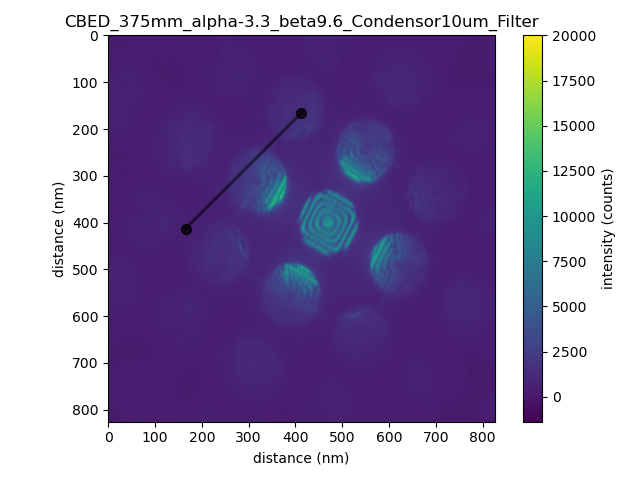

In [3]:
if load_your_own_data:
    datasets = fileWidget.datasets
else:  # load example
    datasets = ft.open_file(os.path.join("../example_data", "CBED_375mm_alpha-3.3_beta9.6_Condensor10um_Filter.dm3"))
main_dataset = datasets['Channel_000']

view = main_dataset.plot(vmax=20000)

def select(k):
    pass
line = pyTEMlib.image_tools.LineSelector(view.axes[0], select, 30)

## Plot Profile and select to measure distances

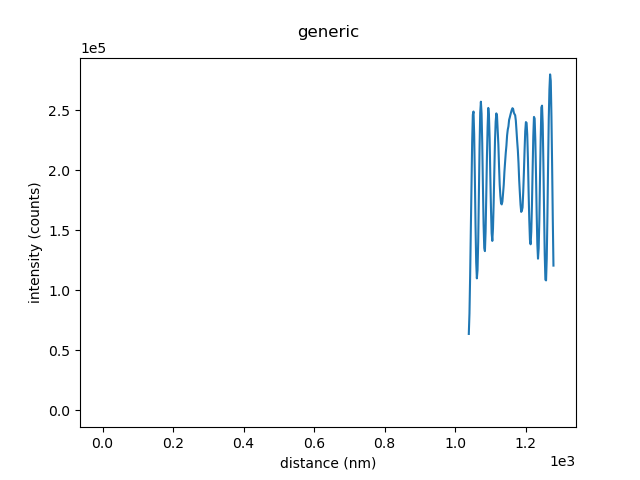

In [8]:
from matplotlib.widgets import  RectangleSelector
profile = pyTEMlib.image_tools.get_profile(main_dataset, line)
view=profile.plot()
selector_profile = RectangleSelector(plt.gca(), None,interactive=True )  # gca get current axis (plot)


Run code cell below to determine distance of selection in profile

In [10]:
xmin, xmax, ymin, ymax = selector_profile.extents
print('distance is' , xmax-xmin , ' pixels' )

distance is 172.80719171597502  pixels


## Homework

> STEP 1: MEASURE THE BRAGG ANGLE
1. Measure the distance of the double Bragg angle in pixel and put this value in a Excel spreadsheet.
2. Enter all the necessary constants: $\lambda$ and the lattice plane distance d
3. Measure the distance of each bright line from the center line and put it in a table in that Excel spread sheet. Use $\theta_i$ and $n$ as column heads.

> STEP 2: CALCULATE THE EXCITATION ERROR

Calculate the excitation error $s_i$ for all minima in the diffracted disk with ¸ $\lambda =$ 2.5 pm and d for the [200] lattice planes according to the following formula:

$$ s_i = \frac{\Delta \theta_i}{2\theta_B \cdot d^2} \cdot \lambda
$$

Do it in a table format.

> STEP 3: DETERMINE THICKNESS AND EXCTINCTION DISTANCE FROM A PLOT

Note that the line must have a negative slope (you will need to increase starting values of $n$ till slope is negative)


## Note

>The extinction distance is a unique materials parameter